In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('listings_limpio.csv', index_col=0)
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Chamartín,Private room,59,1,81,0.57,1,149,3
1,Latina,Private room,31,4,33,0.38,2,131,0
2,Arganzuela,Entire home/apt,50,15,0,NaN,6,311,0
3,Centro,Entire home/apt,92,5,14,0.16,1,167,4
4,Arganzuela,Private room,29,2,154,1.09,1,344,5


# EJERCICIO 1

Chequead los outliers y haced la gestión de ellos, como aprendimos en las lecciones de limpieza.

In [5]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,59,1,81,0.57,1,149,3
1,31,4,33,0.38,2,131,0
2,50,15,0,NaN,6,311,0
3,92,5,14,0.16,1,167,4
4,29,2,154,1.09,1,344,5


In [47]:
df.shape

(17606, 9)

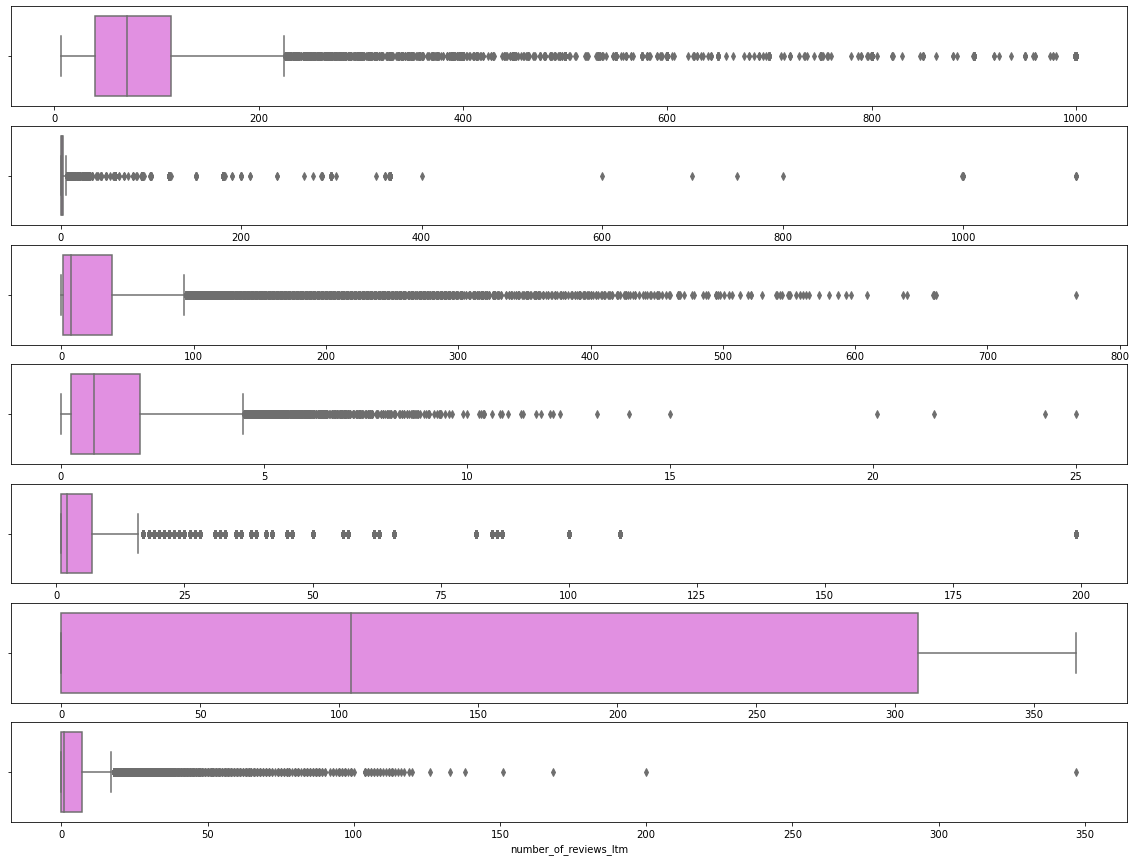

In [21]:
fig, ax= plt.subplots(7,1, figsize=(20,15))
i=0
for column in df_numericas.columns:
    sns.boxplot(x=column, data=df_numericas, color='violet', ax=ax[i])
    ax[i].set(xlabel=column)
    i+=1



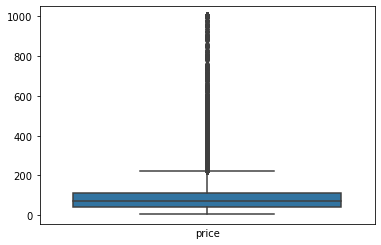

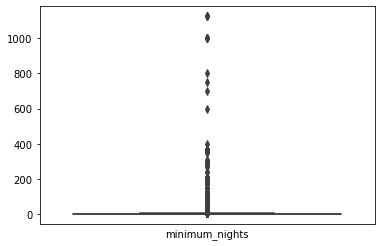

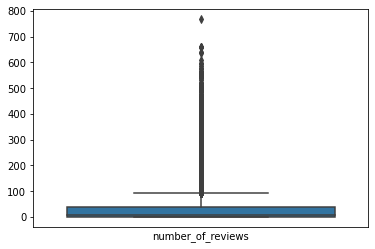

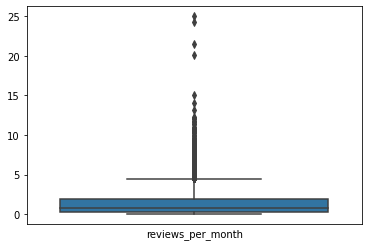

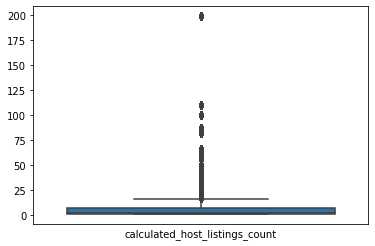

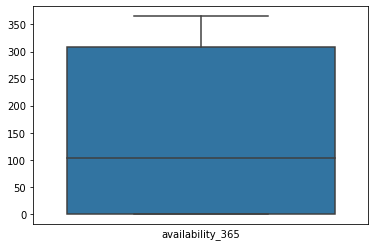

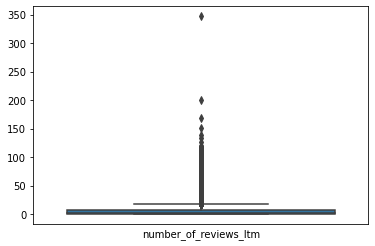

In [24]:
for column in df_numericas.columns:
    plt.figure()
    sns.boxplot(data=df[column])
    plt.xlabel(column)
    plt.xticks([])

ConversionError: Failed to convert value(s) to axis units: Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

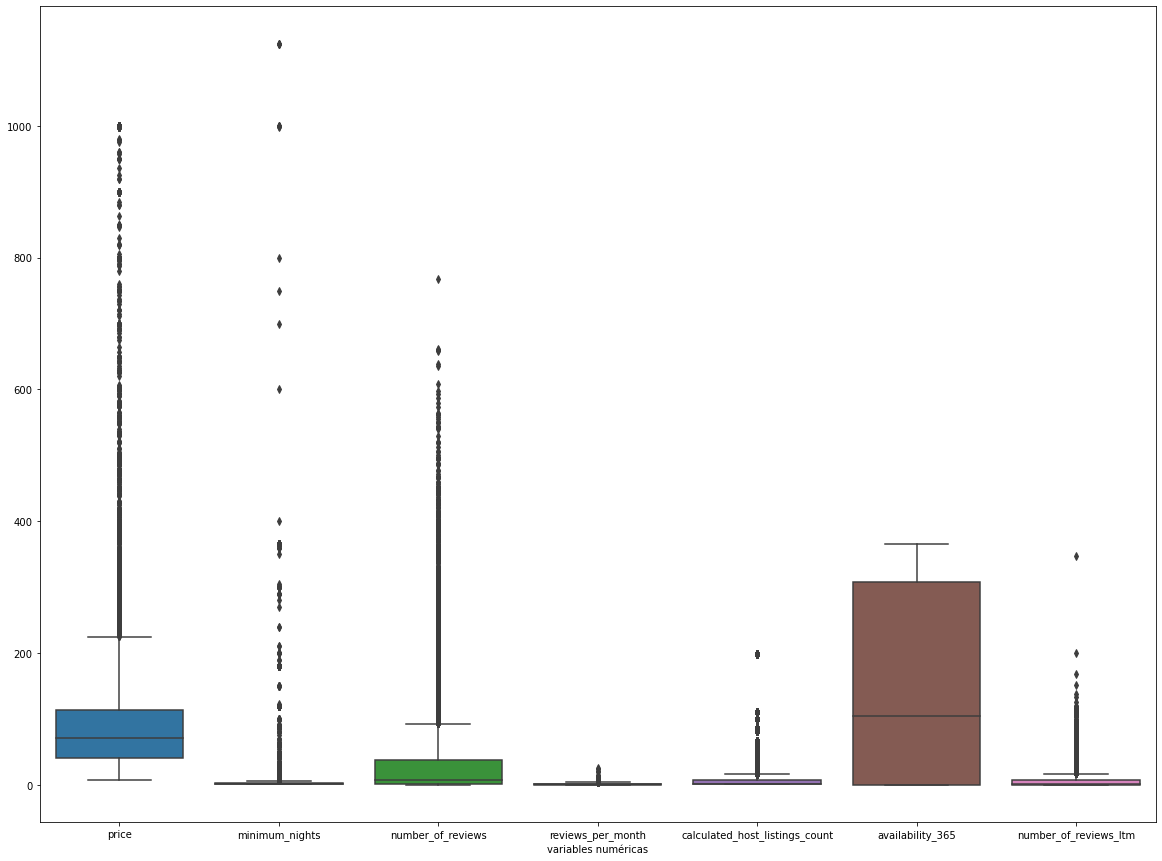

In [30]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df_numericas)
plt.xlabel('variables numéricas')
plt.yticks(df_numericas.columns)

In [38]:
def detectar_outliers(column, df_numericas): 
    
    dicc_indices = {}
    
    Q1 = np.nanpercentile(df_numericas[column], 25)
    Q3 = np.nanpercentile(df_numericas[column], 75)
        
    IQR = Q3 - Q1
        
    limites_outliers = 1.5 * IQR
        
    datos_outliers = df_numericas[(df_numericas[column] < Q1 - limites_outliers) | (df_numericas[column] > Q3 + limites_outliers)]
        
        
    if datos_outliers.shape[0] > 0:  
        
        dicc_indices[column] = (list(datos_outliers.index)) 
        

    
    return dicc_indices 

In [64]:
for x in df_numericas:
    ind = detectar_outliers(x, df_numericas)

In [72]:
for k, v in ind.items():
    media = df_numericas[k].mean()
    for i in v: 
        df_numericas.loc[i,k] = media

/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [73]:
df_numericas.price

0         59
1         31
2         50
3         92
4         29
        ... 
17826     80
17827    185
17828    104
17829     18
17830     33
Name: price, Length: 17606, dtype: int64

ConversionError: Failed to convert value(s) to axis units: Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

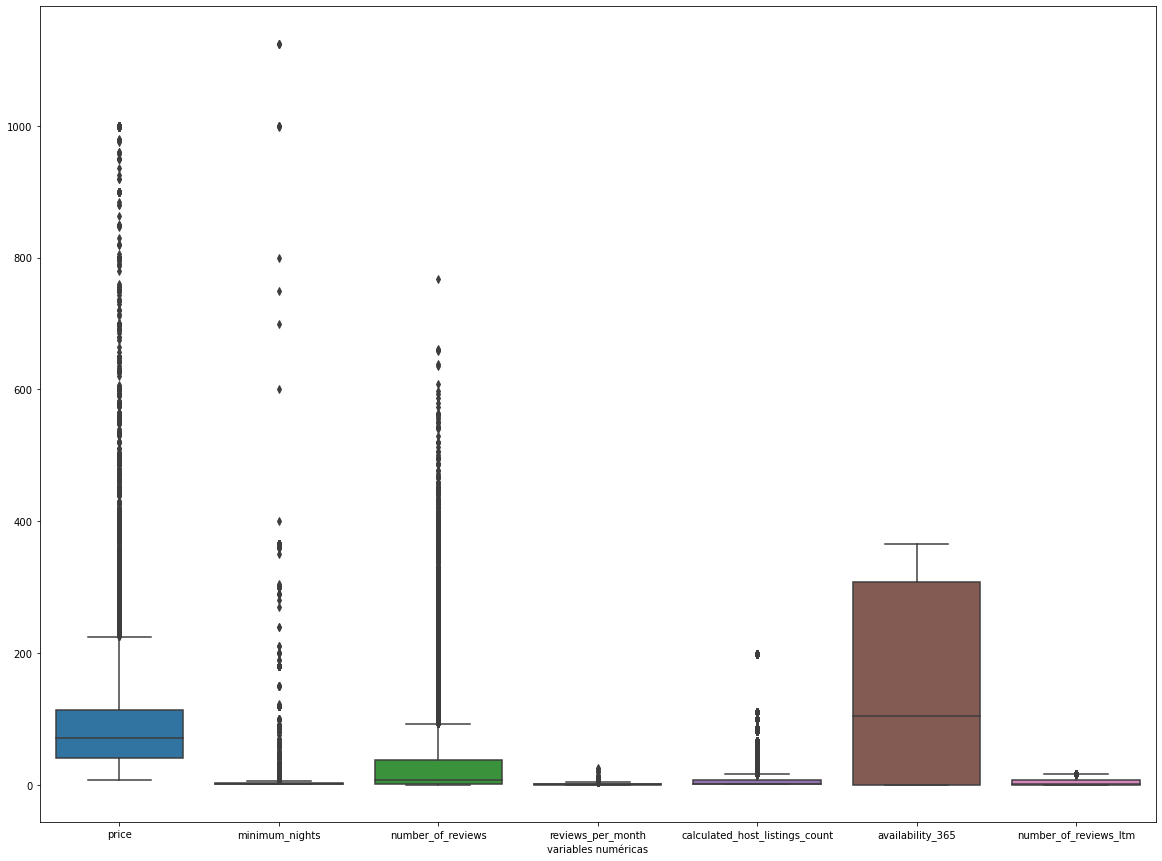

In [74]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df_numericas)
plt.xlabel('variables numéricas')
plt.yticks(df_numericas.columns)